In [10]:
import numpy as np
import os
from PIL import Image, ImageOps
import PIL
import cv2

import sys
import datetime
from sklearn.utils import shuffle


import cv2
import matplotlib.pyplot as plt 
import tensorflow as tf
import pandas as pd
from sklearn.metrics import roc_auc_score  

In [2]:
result_arr=[]
label_list=[]
map={}
map_file_result={}
map_file_label={}
map_new={}
count_label=0
count=0

In [13]:
size = (64,64)

In [3]:
dan_dir=os.getcwd()+"/flower_data_set/dandelion"
tul_dir=os.getcwd()+"/flower_data_set/tulip"

dan_list = os.listdir(dan_dir)
tul_list = os.listdir(tul_dir)

print("The number of images in dandelion is :\t%i" %len(dan_list))
print("The number of images in tulip is :\t%i" %len(tul_list))

The number of images in dandelion is :	1053
The number of images in tulip is :	984


In [14]:
count = 0
for file in dan_list:
    if file==".DS_Store":
        continue
    file_path=os.path.join(dan_dir,file)
 
    label=0
    map[file]=label
    if label not in label_list:
        label_list.append(label)
        map_new[label]=count_label
        count_label=count_label+1
        
    img=Image.open(file_path)
    fit_and_resized_image = ImageOps.fit(img, size, Image.ANTIALIAS)
    result=np.array(fit_and_resized_image )
    img = img.resize((64, 64), PIL.Image.ANTIALIAS)
    result=np.array([])
#     r,g,b=img.split()
 
# #     transform the image into 64*64 in each channel
#     r_arr=np.array(r).reshape(4096)
#     g_arr=np.array(g).reshape(4096)
#     b_arr=np.array(b).reshape(4096)
    
    
#     img_arr=np.concatenate((r_arr,g_arr,b_arr))
#     result=np.concatenate((result,img_arr))
#     result=result.reshape((64,64,3))
#     result=result/255.0
    map_file_result[file]=result
    result_arr.append(result)
    count=count+1

In [15]:
print(count)

1052


(64, 64, 3)


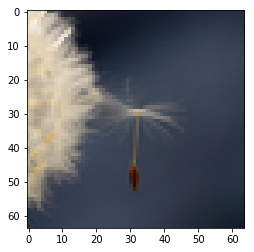

In [12]:
file = dan_list[1]

file_path=os.path.join(dan_dir,file)

label=0
map[file]=label

if label not in label_list:
    label_list.append(label)
    map_new[label]=count_label
    count_label=count_label+1

img=Image.open(file_path)
size = (64,64)
fit_and_resized_image = ImageOps.fit(img, size, Image.ANTIALIAS)
img_np=np.array(fit_and_resized_image )
print(img_np.shape)
imgplot = plt.imshow(img_np)
plt.show()


In [17]:
for file in tul_list:
    if file==".DS_Store":
        continue
    file_path=os.path.join(tul_dir,file)
 
    label=1
    map[file]=label
    if label not in label_list:
        label_list.append(label)
        map_new[label]=count_label
        count_label=count_label+1
        
    img=Image.open(file_path)
    fit_and_resized_image = ImageOps.fit(img, size, Image.ANTIALIAS)
    result=np.array(fit_and_resized_image )
    img = img.resize((64, 64), PIL.Image.ANTIALIAS)
    result=np.array([])
#     r,g,b=img.split()
 
# #     transform the image into 64*64 in each channel
#     r_arr=np.array(r).reshape(4096)
#     g_arr=np.array(g).reshape(4096)
#     b_arr=np.array(b).reshape(4096)
    
    
#     img_arr=np.concatenate((r_arr,g_arr,b_arr))
#     result=np.concatenate((result,img_arr))
#     result=result.reshape((64,64,3))
#     result=result/255.0
    map_file_result[file]=result
    result_arr.append(result)
    count=count+1

In [18]:
print(count)

2036


In [20]:
for file in dan_list:
    if file==".DS_Store":
        continue
    map_file_label[file]=map_new[map[file]]

for file in tul_list:
    map_file_label[file]=map_new[map[file]]

In [22]:
ret_arr=[]
for file in dan_list:
    if file==".DS_Store":
        continue
    each_list=[]
    label_one_zero=np.zeros(count_label)
    result=map_file_result[file]
    label=map_file_label[file]
    label_one_zero[label]=1.0
    #print(label_one_zero)
    each_list.append(result)
    each_list.append(label_one_zero)
    ret_arr.append(each_list)
for file in tul_list:
    if file==".DS_Store":
        continue
    each_list=[]
    label_one_zero=np.zeros(count_label)
    result=map_file_result[file]
    label=map_file_label[file]
    label_one_zero[label]=1.0
    #print(label_one_zero)
    each_list.append(result)
    each_list.append(label_one_zero)
    ret_arr.append(each_list)
save_dir = os.getcwd()+"/flower_test_data.npy"
np.save(save_dir, ret_arr)


# Check the Data

In [23]:
original_train_data = np.load(os.path.join(os.getcwd(),'flower_test_data.npy'))

In [25]:
print("the shape of train_data is: \t",(original_train_data.shape))

the shape of train_data is: 	 (2036, 2)


In [26]:
# we would like to check the ratio of two binary classes in the training set
pos = 0
neg = 0
for i in original_train_data:
    one_hot_label = i[1]
    if one_hot_label[0] == 0:
        pos+=1
    else:
        neg+=1

print("The number of positive labels is %i" %pos)
print("The number of ngeative labels is %i" %neg)

The number of positive labels is 984
The number of ngeative labels is 1052


In [27]:
IMG_SIZE_ALEXNET = 227

In [36]:
print(original_train_data[100][0])
print(original_train_data[0][1])

[]
[1. 0.]


In [30]:
images = original_train_data[:64]

print(images.shape)

fig = plt.figure(figsize=(20, 20))
for m in range(1, 8*8 +1):
    img = images[m-1].reshape([IMG_SIZE_ALEXNET, IMG_SIZE_ALEXNET, 3])
    fig.add_subplot(8, 8, m)
    plt.imshow(img)
    plt.axis('off')
plt.show()

(64, 2)


ValueError: cannot reshape array of size 2 into shape (227,227,3)

<Figure size 1440x1440 with 0 Axes>

In [29]:
original_train_data = shuffle(original_train_data)
for i in range(len(original_train_data)):
    original_train_data[i][0] = cv2.resize(original_train_data[i][0],(IMG_SIZE_ALEXNET,IMG_SIZE_ALEXNET))

# Split the train data in train set and validation set
validation_data = original_train_data[1600:]
train_data = original_train_data[:1600]

# cv means the validation part, but here why we need this reshape? I think it is useless

# X = np.array([i[0] for i in train_data]).reshape(-1,IMG_SIZE_ALEXNET,IMG_SIZE_ALEXNET,3)
X = np.array([i[0] for i in train_data])
Y = np.array([i[1] for i in train_data])


v_x = np.array([i[0] for i in validation_data])
v_y = np.array([i[1] for i in validation_data])

error: OpenCV(4.1.0) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/resize.cpp:3718: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [12]:
epochs = 10
batch = 8

steps = len(train_data)
remaining = steps % batch

validating_size = 40
nodes_fc1 = 4096
nodes_fc2 = 4096
output_classes = 2

IMG_SIZE_ALEXNET = 227

TRAIN_DIR = os.getcwd()
print(TRAIN_DIR) 

/Users/cesare/Downloads/TensorFlow-Binary-Image-Classification-using-CNN-s-master


In [13]:
print(X.shape)
print(Y.shape)

print(v_x.shape)
print(v_y.shape)


(1600, 227, 227, 3)
(1600, 2)
(436, 227, 227, 3)
(436, 2)


In [14]:
# Reset Calculate Graph
tf.reset_default_graph()

# Define Placeholder for a 3 Channel IMAGE
x = tf.placeholder(tf.float32,shape=[None,IMG_SIZE_ALEXNET,IMG_SIZE_ALEXNET,3])
# x = tf.placeholder(tf.float32,shape=[None,IMG_SIZE_ALEXNET,IMG_SIZE_ALEXNET,1])  ///TBD///
y = tf.placeholder(tf.float32,shape=[None,output_classes])

#------------CNN Layer1------------
# 1  channel input ///TBD///
# 96 channel output 55*55 each
w1 = tf.Variable(tf.truncated_normal([11,11,3,96], stddev=0.01))
# w1 = tf.Variable(tf.truncated_normal([11,11,1,96], stddev=0.01))   ///TBD///
b1 = tf.Variable(tf.constant(0.0, shape=[[11,11,3,96][3]]))

output1 = tf.nn.conv2d(x,w1,strides = [1,4,4,1], padding = 'VALID')
output1 = output1+b1
output1 = tf.nn.relu(output1)

#------------Pooling Layer1------------
# 96 channel input 55*55 each
# 96 channel output 27*27 each
output1 = tf.nn.max_pool(output1, ksize=[1, 3, 3, 1],strides=[1, 2, 2, 1], padding='VALID')

#------------CNN Layer2------------
# 96 channel input 27*27 each
# 256 channel output 27*27 each
w2 = tf.Variable(tf.truncated_normal([5,5,96,256], stddev=0.01))
b2 = tf.Variable(tf.constant(1.0, shape=[[5,5,96,256][3]]))

output2 = tf.nn.conv2d(output1, w2,strides=[1, 1, 1, 1], padding='SAME')
output2 = output2 + b2
output2 = tf.nn.relu(output2)

#------------Pooling Layer2------------
# 256 channel input 27*27 each
# 256 channel output 13*13 each
output2 = tf.nn.max_pool(output2, ksize=[1, 3, 3, 1],strides=[1, 2, 2, 1], padding='VALID')

#------------CNN Layer3------------
# 256 channel input 13*13 each
# 384 channel output 13*13 each
w3 = tf.Variable(tf.truncated_normal([3, 3, 256, 384], stddev=0.01))
b3 = tf.Variable(tf.constant(0.0, shape=[[3, 3, 256, 384][3]]))

output3 = tf.nn.conv2d(output2, w3,strides=[1, 1, 1, 1], padding='SAME')
output3 = output3 + b3
output3 = tf.nn.relu(output3)

#------------CNN Layer4------------
# 384 channel input 13*13 each
# 384 channel output 13*13 each
w4 = tf.Variable(tf.truncated_normal([3, 3, 384, 384], stddev=0.01))
b4 = tf.Variable(tf.constant(0.0, shape=[[3, 3, 384, 384][3]]))

output4 = tf.nn.conv2d(output3, w4,strides=[1, 1, 1, 1], padding='SAME')
output4 = output4 + b4
output4 = tf.nn.relu(output4)

#------------CNN Layer5------------
# 384 channel input 13*13 each
# 256 channel output 13*13 each
w5 = tf.Variable(tf.truncated_normal([3, 3, 384, 256], stddev=0.01))
b5 = tf.Variable(tf.constant(0.0, shape=[[3, 3, 384, 256][3]]))

output5 = tf.nn.conv2d(output4, w5,strides=[1, 1, 1, 1], padding='SAME')
output5 = output5 + b5
output5 = tf.nn.relu(output5)

#------------Pooling Layer3------------
# 256 channel output 13*13 each
# 256 channel output 6*6 each
output5 = tf.nn.max_pool(output5, ksize=[1, 3, 3, 1],strides=[1, 2, 2, 1], padding='VALID')

Instructions for updating:
Colocations handled automatically by placer.


In [15]:
#------------Flatten------------
# 256 channel input 6*6 each
# output a vector or 6*6*256
flattened = tf.reshape(output5,[-1,6*6*256])

#------------Fully connected Layer1------------
# input_size = int(flattened.get_shape()[1])=6*6*256
# output neural nodes: nodes1_fc1
input_size = int(flattened.shape[1])
w1_fc = tf.Variable(tf.truncated_normal([input_size, nodes_fc1], stddev=0.01))
b1_fc = tf.Variable(tf.constant(1.0, shape=[nodes_fc1]))

output_fc1 = tf.matmul(flattened, w1_fc) + b1_fc
output_fc1 = tf.nn.relu(output_fc1)

#------------Dropout Layer1------------
hold_prob1 = tf.placeholder(tf.float32)
# output_fc1 = tf.nn.dropout(output_fc1,rate=1-hold_prob1)
output_fc1 = tf.nn.dropout(output_fc1,keep_prob=hold_prob1)
# Here we should also use rate  = 1-keep_prob = 1-hold_prob


#------------Fully connected Layer2------------
# input neurons: nodes1_fc1
# output neurons: nodes1_fc2
w2_fc = tf.Variable(tf.truncated_normal([nodes_fc1, nodes_fc2], stddev=0.01))
b2_fc = tf.Variable( tf.constant(1.0, shape=[nodes_fc2]))

output_fc2 = tf.matmul(output_fc1, w2_fc) + b2_fc
output_fc2 = tf.nn.relu(output_fc2)

#------------Dropout Layer2------------
hold_prob2 = tf.placeholder(tf.float32)
# output_fc2 = tf.nn.dropout(output_fc2,rate=1-hold_prob2)
output_fc2 = tf.nn.dropout(output_fc2,keep_prob=hold_prob2)


#------------Fully Connected Layer 3------------
w3_fc = tf.Variable(tf.truncated_normal([nodes_fc2,output_classes], stddev=0.01))
b3_fc = tf.Variable(tf.constant(1.0, shape=[output_classes]))

prediction = tf.matmul(output_fc2, w3_fc) + b3_fc

# REMEMBER: In the output layer, we don't apply activate function, and we get a 2 dimension vector of y

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [16]:
#Defining loss function
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y,logits=prediction))
#Define Loss function with specific confusion matrix ///TBD///

#Define objective
train = tf.train.AdamOptimizer(learning_rate=0.00001).minimize(cross_entropy)

#Define Accuracy
matches = tf.equal(tf.argmax(prediction,1),tf.argmax(y,1))
acc = tf.reduce_mean(tf.cast(matches,tf.float32))

#Global Initialization
init = tf.global_variables_initializer()

In [17]:
#Starting Empty lists to keep results
acc_list = []
auc_list = []
loss_list = []
saver = tf.train.Saver()

In [18]:
# GPU Training

config = tf.ConfigProto(allow_soft_placement=True)
config.gpu_options.allow_growth = True
config.gpu_options.allocator_type = 'BFC'

currentDT = datetime.datetime.now()
print("------------Strat to Train------------")
print(str(currentDT))


with tf.Session(config=config) as sess:
    sess.run(init)
    
#     this is the training part
    
#     Here we only set the epochs to 5
    epochs = 5
    for i in range(epochs):
        for j in range(0,steps-remaining,batch):
            #Feeding step_size-amount data with 0.5 keeping probabilities on DROPOUT LAYERS
            _,c = sess.run([train,cross_entropy],
			feed_dict={x:X[j:j+batch] , y:Y[j:j+batch],hold_prob1:0.5,hold_prob2:0.5})
        
        
		#Writing for loop to calculate test statistics. GTX 1050 isn't able to calculate all test data.
        cv_auc_list = []
        cv_acc_list = []
        cv_loss_list = []
        # Validation after one epoch
        for v in range(0,len(v_x)-int(len(v_x) % validating_size),validating_size):
            acc_on_cv,loss_on_cv,preds = sess.run([acc,cross_entropy,tf.nn.softmax(prediction)],
			feed_dict={x:v_x[v:v+validating_size] ,y:v_y[v:v+validating_size] ,hold_prob1:1.0,hold_prob2:1.0})
			
            auc_on_cv = roc_auc_score(v_y[v:v+validating_size],preds)
            cv_acc_list.append(acc_on_cv)
            cv_auc_list.append(auc_on_cv)
            cv_loss_list.append(loss_on_cv)
        acc_cv_ = round(np.mean(cv_acc_list),5)
        auc_cv_ = round(np.mean(cv_auc_list),5)
        loss_cv_ = round(np.mean(cv_loss_list),5)
        acc_list.append(acc_cv_)
        auc_list.append(auc_cv_)
        loss_list.append(loss_cv_)
        print("------------Epoch %i Finished------------" %i)
        currentDT = datetime.datetime.now()
        print(str(currentDT))
        print("Epoch:",i,"Accuracy:",acc_cv_,"Loss:",loss_cv_ ,"AUC:",auc_cv_)
    
    print("------------Training Stage Finished------------")

------------Strat to Train------------
2019-06-03 06:25:37.437165
------------Epoch 0 Finished------------
2019-06-03 06:28:50.207885
Epoch: 0 Accuracy: 0.505 Loss: 0.72366 AUC: 0.75216
------------Epoch 1 Finished------------
2019-06-03 06:31:48.141983
Epoch: 1 Accuracy: 0.505 Loss: 0.84096 AUC: 0.67515
------------Epoch 2 Finished------------
2019-06-03 06:34:48.127826
Epoch: 2 Accuracy: 0.505 Loss: 0.70731 AUC: 0.79926
------------Epoch 3 Finished------------
2019-06-03 06:37:54.750901
Epoch: 3 Accuracy: 0.505 Loss: 0.72733 AUC: 0.79316
------------Epoch 4 Finished------------
2019-06-03 06:40:57.343791
Epoch: 4 Accuracy: 0.505 Loss: 0.74108 AUC: 0.81181
------------Training Stage Finished------------


In [21]:
with tf.Session() as session:
    saver.restore(session, "CNN_MC.ckpt")
    print("Model restored.") 
    print('Initialized')
    k = session.run([tf.nn.softmax(prediction)], feed_dict={x:v_x[0:64] , hold_prob1:1,hold_prob2:1})

print(np.array(k).shape)

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from CNN_MC.ckpt


NotFoundError: Restoring from checkpoint failed. This is most likely due to a Variable name or other graph key that is missing from the checkpoint. Please ensure that you have not altered the graph expected based on the checkpoint. Original error:

Key Variable_10/Adam not found in checkpoint
	 [[node save/RestoreV2 (defined at <ipython-input-17-aafdc0514b4f>:5) ]]

Caused by op 'save/RestoreV2', defined at:
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/asyncio/base_events.py", line 528, in run_forever
    self._run_once()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/asyncio/base_events.py", line 1764, in _run_once
    handle._run()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tornado/ioloop.py", line 758, in _run_callback
    ret = callback()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tornado/gen.py", line 1233, in inner
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tornado/gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 370, in dispatch_queue
    yield self.process_one()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tornado/gen.py", line 346, in wrapper
    runner = Runner(result, future, yielded)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tornado/gen.py", line 1080, in __init__
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tornado/gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2819, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2845, in _run_cell
    return runner(coro)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3020, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3185, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-17-aafdc0514b4f>", line 5, in <module>
    saver = tf.train.Saver()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/training/saver.py", line 832, in __init__
    self.build()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/training/saver.py", line 844, in build
    self._build(self._filename, build_save=True, build_restore=True)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/training/saver.py", line 881, in _build
    build_save=build_save, build_restore=build_restore)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/training/saver.py", line 513, in _build_internal
    restore_sequentially, reshape)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/training/saver.py", line 332, in _AddRestoreOps
    restore_sequentially)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/training/saver.py", line 580, in bulk_restore
    return io_ops.restore_v2(filename_tensor, names, slices, dtypes)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/ops/gen_io_ops.py", line 1572, in restore_v2
    name=name)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 3300, in create_op
    op_def=op_def)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 1801, in __init__
    self._traceback = tf_stack.extract_stack()

NotFoundError (see above for traceback): Restoring from checkpoint failed. This is most likely due to a Variable name or other graph key that is missing from the checkpoint. Please ensure that you have not altered the graph expected based on the checkpoint. Original error:

Key Variable_10/Adam not found in checkpoint
	 [[node save/RestoreV2 (defined at <ipython-input-17-aafdc0514b4f>:5) ]]


(64, 227, 227, 3)


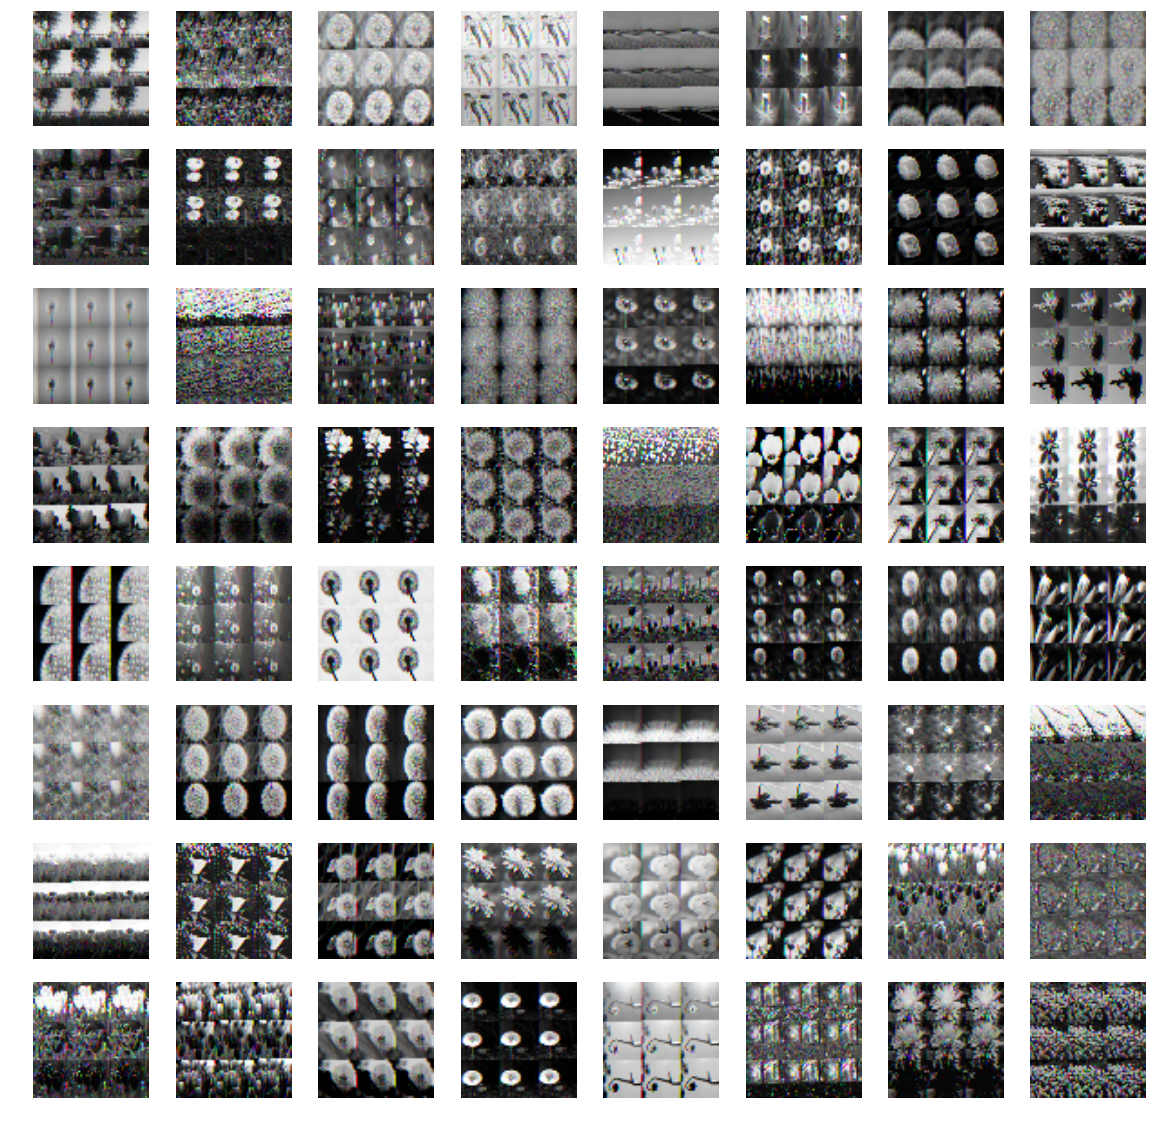

In [22]:
images = v_x[:64]

print(images.shape)

fig = plt.figure(figsize=(20, 20))
for m in range(1, 8*8 +1):
    img = images[m-1].reshape([IMG_SIZE_ALEXNET, IMG_SIZE_ALEXNET, 3])
    fig.add_subplot(8, 8, m)
    plt.imshow(img)
    plt.axis('off')
plt.show()